# Regression

### Importando librerías

In [2]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing 
from keras import models, layers, optimizers


### Descargando datos

In [20]:
#dataset 404 ejemplos de casas con 13 tipos variables (cantidad de baños, criminalidad del sector, etc)
#queremos obtener las predicciones de los precios de casas segun sus caracteristicas
(train_data , train_targets) ,(test_data,test_targets) = boston_housing.load_data()

In [4]:
train_data.shape

(404, 13)

In [5]:
train_targets[0] # esa casa cuesta 15.2 mil dolares 

15.2

In [6]:
train_data[0] # las 13 caracteristicas de la casa que la hace valr 15.2 mil dolares

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

## Normalización

In [7]:
#normalizacion es restar la media entre la desviacion estandar
#para que los datos esten entre 0 y 1
mean = train_data.mean(axis=0)
train_data = train_data  - mean
std = train_data.std(axis=0)
train_data = train_data / std

# no se usa la media y desviasion de la de prueba para no darle datos de si mismo
test_data = test_data - mean
test_data = test_data / std



### Definiendo nuestra red

In [8]:
def build_model_regression(input_data):
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(input_data,)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
    return model

## K - fold validation

In [9]:
k = 4
num_val_samples = len(train_data) // 4
num_epoch = 80
all_history = []

In [10]:
0*num_val_samples

0

In [11]:
(0+1) * num_val_samples

101

In [12]:
for i in range(k):
    print("Fold " , i)

    #sets de validacion
    val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]
    
    #sets de entrenamiento
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
     train_data[(i+1) * num_val_samples:]],
     axis= 0   
    )
    
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i+1) * num_val_samples:]],
     axis= 0   
    )    

    #13 ejemplos
    model = build_model_regression(13)
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epoch, batch_size =16, 
                        validation_data = (val_data, val_targets),
                        verbose=0)
    
    #contiene los resutlados
    all_history.append(history.history['val_mae'])
    

Fold  0
Fold  1
Fold  2
Fold  3


### Media de todos los MAE

In [13]:
#son 80 posibles resutados, porque fueron 80 epocs
len(all_history[0])

80

In [17]:
#sacar la media de cada iteracion
pd.DataFrame(all_history)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
0,18.303316,14.554929,9.879620,5.787720,4.167642,3.553075,3.211353,3.055146,2.967200,2.872043,2.639772,2.590898,2.532614,2.489907,2.498892,2.432247,2.399236,2.373197,2.287136,2.280500,2.252827,2.141805,2.155841,2.102134,2.159640,2.187609,2.129126,2.035847,2.193767,2.068650,2.073047,2.019608,2.172619,2.008657,2.048145,2.017394,2.013420,2.076441,2.009254,1.973705,2.165105,1.947559,2.199009,1.987861,2.117372,2.036089,2.099914,1.947250,2.201006,2.140340,1.864755,1.908745,2.071775,1.896098,2.067023,2.236597,2.046046,1.933231,2.004573,2.010330,1.980356,1.989047,2.088467,1.884439,1.909957,1.900393,1.918240,1.869726,2.002923,1.907928,1.950534,1.976910,1.880911,1.870919,1.951321,1.918324,1.877958,1.917132,2.229653,1.967503
1,18.807011,15.161169,11.028012,7.868407,5.993281,4.947345,4.264236,3.775564,3.506969,3.340012,3.228895,3.105055,3.055863,3.056732,2.966428,2.994613,2.917455,2.970349,2.870182,2.836643,2.802377,2.862708,2.709980,2.734616,2.844469,2.643409,2.756746,2.698002,2.613945,2.820853,2.580462,2.543054,2.732955,2.597589,2.634698,2.529434,2.583627,2.828933,2.486465,2.542797,2.512494,2.534124,2.519714,2.679593,2.572044,2.674952,2.655824,2.605026,2.518735,2.478879,2.504579,2.594809,2.763321,2.561491,2.723327,2.620317,2.463969,2.618126,2.543569,2.499313,2.554849,2.612892,2.589031,2.542278,2.774343,2.427709,2.519835,2.634024,2.733680,2.801356,2.418820,2.470073,2.411563,2.409157,2.541306,2.592629,2.458071,2.496043,2.553332,2.472295
2,18.423998,14.860961,10.568254,6.957390,4.961969,3.958396,3.436250,3.179290,3.219720,3.024566,2.983114,2.858528,2.757733,2.761580,2.802042,2.645885,2.626955,2.617885,2.640968,2.593483,2.592720,2.644168,2.548048,2.575399,2.545797,2.545399,2.570079,2.585850,2.563521,2.514512,2.494159,2.575100,2.560417,2.521279,2.501101,2.555035,2.556743,2.622837,2.460953,2.633627,2.514278,2.531566,2.461968,2.516566,2.479665,2.505849,2.507115,2.527542,2.487801,2.477376,2.531114,2.486753,2.458787,2.546649,2.419681,2.444690,2.435747,2.421831,2.370974,2.446189,2.466918,2.366679,2.403219,2.437439,2.449703,2.386116,2.420286,2.442242,2.415492,2.390804,2.421309,2.412543,2.394756,2.418567,2.431827,2.432194,2.356058,2.381373,2.389132,2.391109
3,20.842484,16.828424,12.134600,7.999230,6.286290,5.227870,4.432261,4.087714,3.829542,3.582583,3.477248,3.375814,3.248257,3.160841,3.130571,3.012016,2.930162,2.965429,2.842285,2.802413,2.781959,2.792121,2.725211,2.802337,2.693904,2.689029,2.692601,2.684270,2.743736,2.641557,2.571802,2.631196,2.750990,2.694038,2.551700,2.499738,2.572970,2.501921,2.500260,2.649114,2.686004,2.695460,2.546864,2.522580,2.527973,2.471021,2.492296,2.448188,2.525436,2.472635,2.516211,2.549714,2.581167,2.492969,2.525864,2.453895,2.427075,2.496410,2.437731,2.470049,2.500122,2.473516,2.470287,2.468724,2.430371,2.530360,2.432078,2.459430,2.453739,2.470070,2.475956,2.431051,2.459370,2.450939,2.428260,2.455733,2.462840,2.465452,2.513207,2.509310


In [14]:
#sacamos la media de cada registro de las 80 epocs
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)
all_mae_avg

0     19.094202
1     15.351371
2     10.902622
3      7.153187
4      5.352296
        ...    
75     2.349720
76     2.288732
77     2.315000
78     2.421331
79     2.335054
Length: 80, dtype: float64

### Visualizando resultados

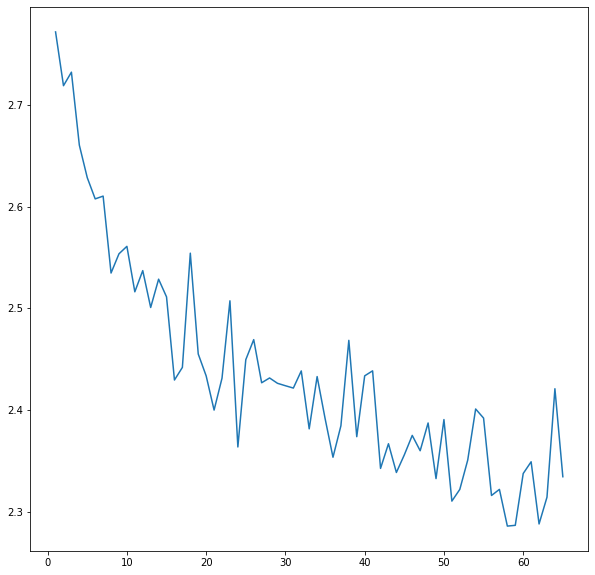

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[15:])+1), all_mae_avg[15:])
plt.show()

### Evaluando el modelo

In [19]:
model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 19.6414 - mae: 2.7705


[19.641437530517578, 2.7704598903656006]

In [24]:
def build_model_regression(input_data):
    model = models.Sequential()
    model.add(layers.Dense(50,activation='relu',input_shape=(input_data,)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(50,activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
    return model

k = 5
num_val_samples = len(train_data) // 4
num_epoch = 70
all_history = []

for i in range(k):
    print("Fold " , i)

    #sets de validacion
    val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]
    
    #sets de entrenamiento
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
     train_data[(i+1) * num_val_samples:]],
     axis= 0   
    )
    
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i+1) * num_val_samples:]],
     axis= 0   
    )    

    #13 ejemplos
    model = build_model_regression(13)
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epoch, batch_size =16, 
                        validation_data = (val_data, val_targets),
                        verbose=0)
    
    #contiene los resutlados
    all_history.append(history.history['val_mae'])

all_mae_avg = pd.DataFrame(all_history).mean(axis=0)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[15:])+1), all_mae_avg[15:])
plt.show()

Fold  0
Fold  1
Fold  2
Fold  3
Fold  4


KeyError: ignored